## Trabajo 1: Solución lineal de sistemas lineales en Julia

* Objetivo:Comparar diferentes métodos de resolución de sistemas lineales de gran tamaño con un problema de EDP que genera matrices no simétricas en base a los parámetros N, α y ε=1

$$\beta \cdot \bigtriangledown u-\epsilon \bigtriangleup u=0 $$

$$ \beta =\alpha (\frac{\sqrt{2}}{2},\frac{\sqrt{2}}{2})^T $$

Contenido: utilizar el código en python (basado en el código Matlab de A. Meister, Aufgabe 6) y las librerías Julia de C.T. Kelley en https://github.com/ctkelley

Metodología: realizar un notebook de jupyter en Julia con gráficas y tablas de errores y tiempos de cómputo en base a las iteraciones

In [16]:
aux=false
if aux==true
    import Pkg
    Pkg.add("IterativeSolvers")
    Pkg.add("LinearAlgebra")
    Pkg.add("SparseArrays")
end

   Resolving package versions...


  No Changes to `C:\Users\nicol\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\nicol\.julia\environments\v1.9\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\nicol\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\nicol\.julia\environments\v1.9\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\nicol\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\nicol\.julia\environments\v1.9\Manifest.toml`


In [88]:
using LinearAlgebra
using SparseArrays

# Parameters
a = 1;   # Advection parameter
b = 2;     # Reaction parameter
tol = 1e-6;    # Tolerance for stopping criterion
maxit = 100000;  # Maximum number of iterations

# Linear system
N = 250;
dx = 1 / (N + 1);

e = ones(N);
Dxx = spdiagm(-1 => e[1:N-1] , 0 => -2 * e  , 1 => e[1:N-1]);   # 1D central difference

ident = Matrix{Float64}(I, N, N);
x = kron(ident, Dxx) / (dx^2);  # 2nd derivative with respect to x

Axx = kron(ident, Dxx) / (dx^2); # 2nd derivative with respect to x
Ayy = kron(Dxx, ident) / (dx^2);  # 2nd derivative with respect to y

Dx = spdiagm( -1 => e[1:N-1] , 1 => e[1:N-1]);  # 1D central difference
Ax = kron(ident, Dx) / (2 * dx);

I_2 = sparse(Matrix{Float64}(I, N*N, N*N));

A = sparse(-Axx - Ayy - a * Ax - b * I_2);  # Matrix
b = ones(N * N);  # Right-hand side
u0 = 0.5 * ones(N * N);  # Initial guess
A

62500×62500 SparseMatrixCSC{Float64, Int64} with 311500 stored entries:
⎡⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⎦

1. Utilizar métodos directo LU y Choleski para matrices simétricas, y los métodos iterativos CG, BiCG , BiCGStab , GMRES , LGMRES, MINRES, QMR que encuentren en las librerías de Julia. Si encuentran otros , los aportan

Metodos directos:

In [89]:
import LinearAlgebra

#Calcular descomposicion LU
lu_decomposition = lu(A);
L = lu_decomposition.L;U = lu_decomposition.U;P = lu_decomposition.p;
#cholesky
using LinearAlgebra
L_cholesky = cholesky(A);

println("Lu:")
print(L) 
println("\nCholesky: ");
print(L_cholesky)

PosDefException: PosDefException: matrix is not positive definite; Cholesky factorization failed.

Metodos iterativos:

In [90]:
using IterativeSolvers

#CG
xcg,hcg=cg(A,b,log=true,maxiter=maxit);

#Bicg
#xbicg,hbicg=bicg(A,b,log=true)

#bicgstab
xbicgstabl,hbicgstabl=bicgstabl(A,b,log=true);

#gmres
xgmres,hgmres=gmres(A,b,log=true)

#minres
xminres,hminres = minres(A,b,log=true);

#qmr
xqmr,hqmr=qmr(A,b,log=true);



([0.0001676819902138506, 0.0003271185478907637, 0.000481144891840298, 0.0006309517757455969, 0.0007770738322195287, 0.000919745656156351, 0.0010590482549281003, 0.001194977309680095, 0.0013274786828556117, 0.0014564686681464397  …  0.001456468671252378, 0.0013274786856556713, 0.0011949773121729952, 0.0010590482571123782, 0.0009197456580306871, 0.0007770738337830787, 0.0006309517769974132, 0.0004811448927797186, 0.0003271185485173343, 0.0001676819905272313], Converged after 875 iterations.)

In [91]:
#LGMRESusing
using Krylov
xlgmres,hgmres=lgmres(A,b,log=true)


UndefVarError: UndefVarError: `lgmres` not defined

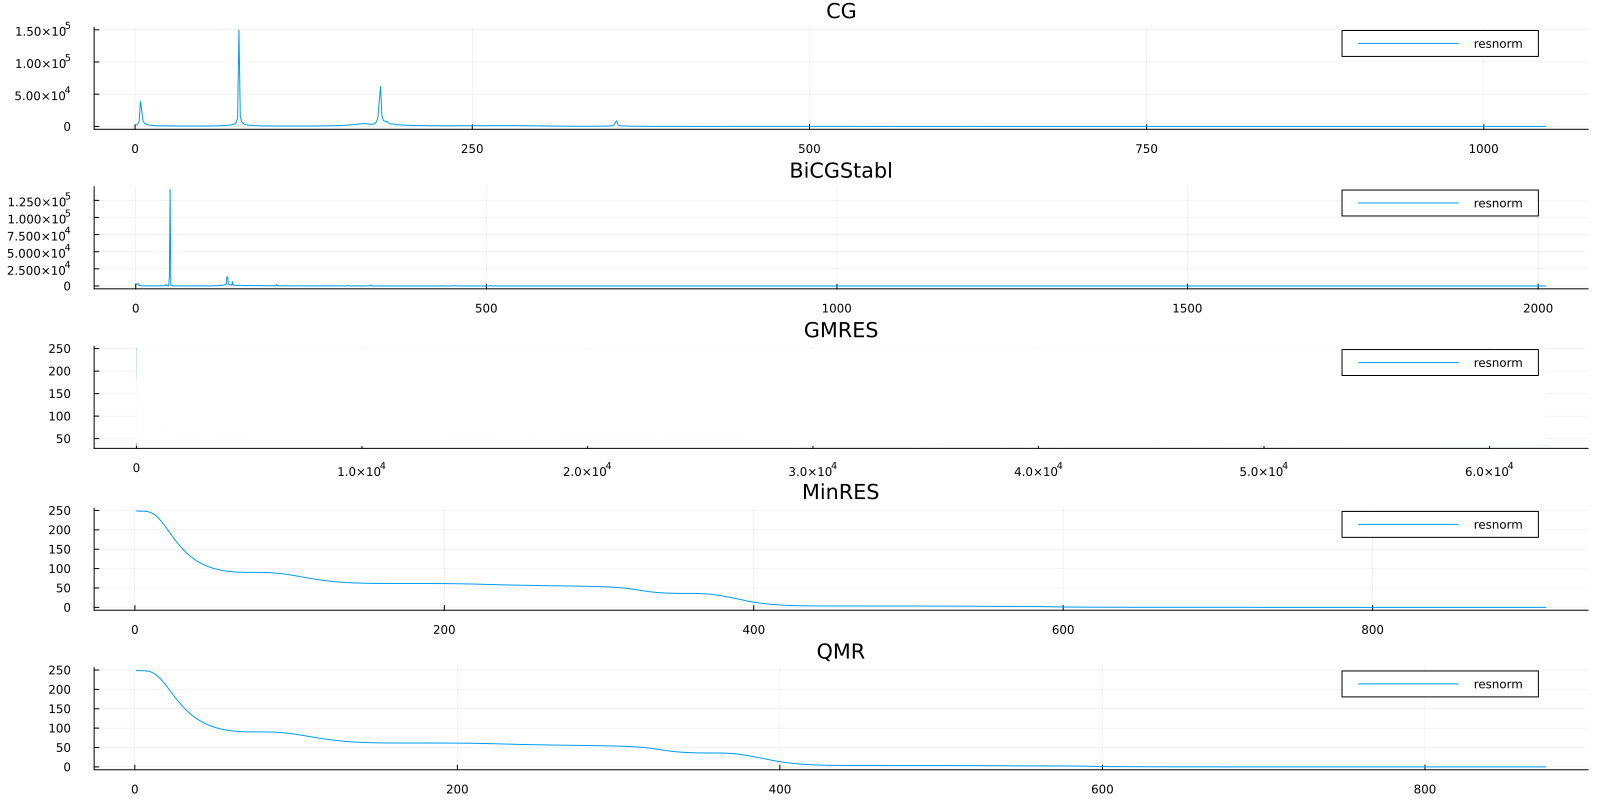

In [92]:
using Plots
plot1 = plot(hcg,title="CG")
plot2 = plot(hbicgstabl,title="BiCGStabl")
plot3 = plot(hgmres,title="GMRES")
plot4 = plot(hminres,title="MinRES")
plot5 = plot(hqmr,title="QMR")

layout = @layout[a ; b ; c ; d;e]

plot(
    plot1,
    plot2,
    plot3,
    plot4,
    plot5,
    layout=layout,size=(1600,800)
)

2. Utilizar escenarios de N y α en base a la presentación . Utilizar el mayor N possible con tiempos esperables menos de una hora).

3. Calcular tiempos y errores en base a las iteraciones de los métodos iterativos y comparar con los métodos directos

4. Analizar los resultados y decidir el métodos más rápido y preciso para cada escenario de N y α.

5. Encontrar las propiedades de las matrices generadas por la linearización en redes neuronales y proponer qué método sería el major para problemas de alta dimensionalidad .